In [9]:
# Standard imports for computation physics
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import typing
import scienceplots

# Pretty styling for graphs
plt.style.use(['science', 'grid', 'scatter', 'notebook'])
plt.rcParams["figure.figsize"] = (12, 8)

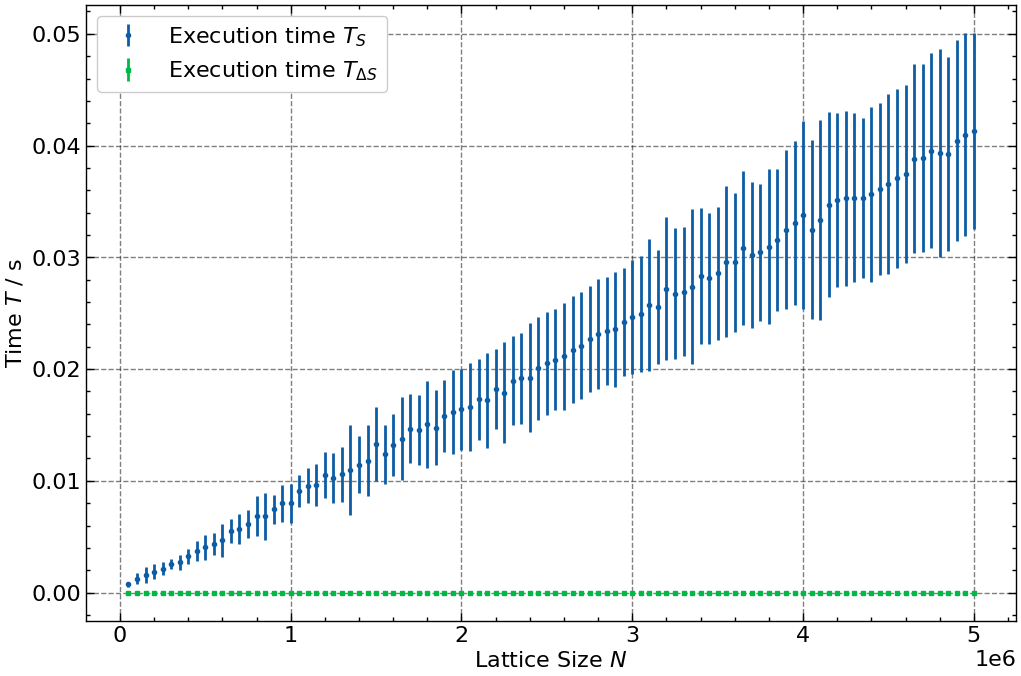

In [16]:
lattice_scaling_data = pd.read_csv('output/lattice_scaling.csv')
plt.errorbar(lattice_scaling_data['Lattice'], lattice_scaling_data['Action'] * 10**(-9), yerr=lattice_scaling_data['DeltaAction'] * 10**(-9), label='Execution time $T_S$')
plt.errorbar(lattice_scaling_data['Lattice'], lattice_scaling_data['DiffAction'] * 10**(-9), yerr=lattice_scaling_data['DeltaDiffAction'] * 10**(-9), label='Execution time $T_{\\Delta S}$')

plt.xlabel('Lattice Size $N$')
plt.ylabel('Time $T$ / s')

plt.legend(loc='upper left')


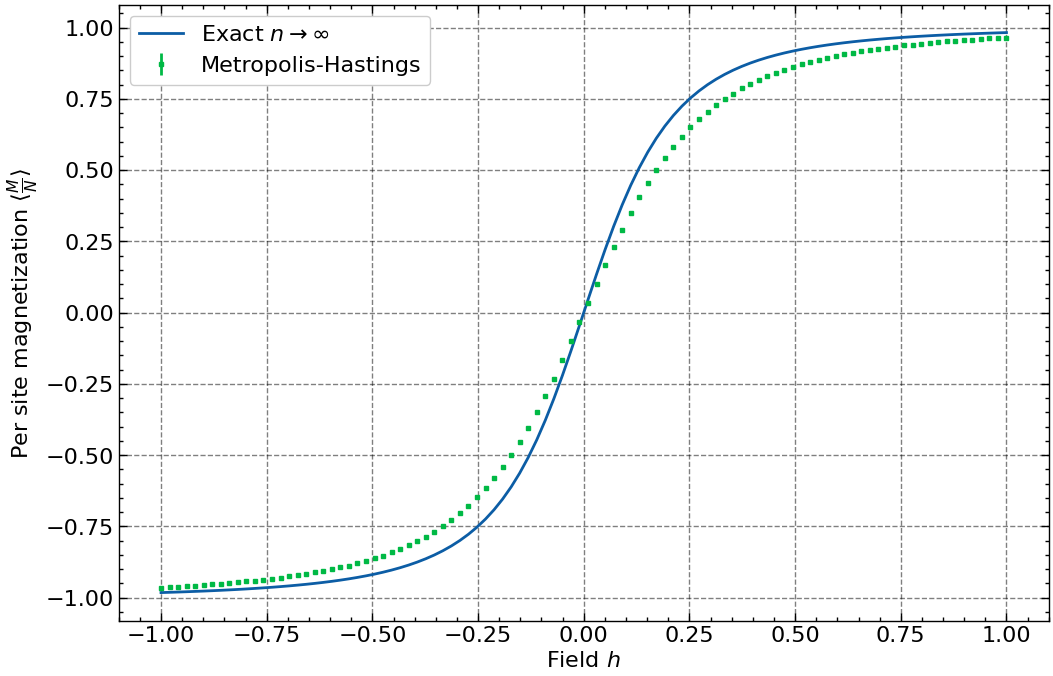

In [58]:
def test(h):
    beta = 1
    j = 0.75
    return np.sinh(h * beta) / np.sqrt(np.sinh(h * beta)**2 + np.exp(-4 * j * beta))


sampling = np.linspace(-1, 1, num=100);
plt.plot(sampling, test(sampling), '-', label='Exact $n \\rightarrow \\infty$')

data = pd.read_csv('output/metropolis.csv')
plt.errorbar(data['h'], data['magnetization'], yerr=data['delta_magnetization'], label='Metropolis-Hastings')

plt.xlabel('Field $h$')
plt.ylabel('Per site magnetization $\\langle \\frac{M}{N} \\rangle$')
plt.legend()

plt.savefig('output/magnetization.pdf', dpi=600, bbox_inches='tight')

<ErrorbarContainer object of 3 artists>

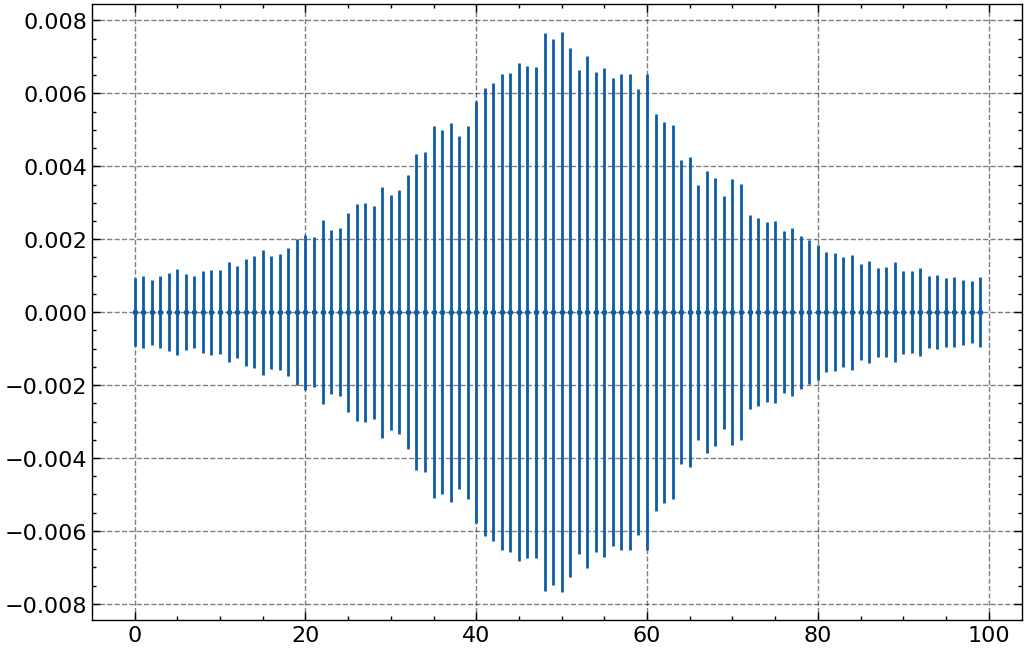

In [59]:
x = np.arange(len(data['h']))
plt.errorbar(x, [0] * x, yerr=data['delta_magnetization'], label='Intensive Magnetization')
